# Minor Project 
## Cardiac Disease Prediction Model

Dataset used: Kaggle Heart Disease dataset

Contributed by: Sayaraj Kundu, Ashutosh Ram,Subhajit Mondal, Dipayan Chowdhury 



## Objective
Create a machine learning model using logistic regression or decision tree or random forest and Kaggle Heart Disease Prediction dataset to predict the heart condition with various factors related to heart.

## ML Overview

Machine learning is a branch of artificial intelligence that enables computers to learn and adapt similar to how humans learn. It is the ability of a machine to detect patterns in data and learn from it so as to be able to take action accordingly. Machine learning algorithms are trained on datasets so they can make ‘informed’ decisions based on the information they have learned. This project covers an overview of what machine learning is, its types and examples of use cases for businesses.

In this project we will use supervised learning (a branch of machine learning where we teach our model with well-labelled data).
We will start with a simple Logistic Regressesion model and predict the target variable, and then move forward with the comparison between other similar models.

## Project Pipeline

* Cleaning our data and making it suitable for our ML model.
* Data exploration and analysis to study our dataset.
* Creating a simple model using logistic regression.
* Using the model to carryout prediction and evaluating it's efficiency.
* Creating a Random Forest Classifer model and comparing its accuracy with our logistic regression model.

## Requirements

Import the mentioned libraries:

- Numpy

- Pandas

- Sklearn

- matplotlib.plt

- Seaborn

- joblib

Import Kaggle dataset from the provided csv file using pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, f1_score, mean_squared_error, mean_absolute_error
import tensorflow as tf

## Data Loading

### About this dataset
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

* age : Age of the patient
* sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
  - Value 0: typical angina
  - Value 1: atypical angina
  - Value 2: non-anginal pain
  - Value 3: asymptomatic
* tresttbps : resting blood pressure (in mm Hg)
* chol : cholesterol in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
  - Value 0: upsloping
  - Value 1: flat
  - Value 2: downsloping
* thal: 
  - 0 = normal blood flow; 
  - 1 = fixed defect;
  - 2 = reversible defect
* target : 0= less chance of heart attack 1= more chance of heart attack


In [2]:
df = pd.read_csv(r"D:\heart.csv")
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0


## Data Exploration
### Assigned Tasks

1. Use functions `head()` and `tail()` to see first and last five rows of the created dataframe.

2. Use `describe()` to get even further insights on the created data frame.

3. Use `df.dtypes` or `df.info()` to know data type various features present in the dataset. If we find categorical data, then we'll require to use different encoding methods.

4. Use `df.isnull().sum()` to check for missing values in each column. If we find missing values, then either we will place values there or we can drop the row or column.

5. Create a heatmap using seaborn to find corelation between different features and labels. In model creation we will be using features having a high corelation with our target label.

6. Plot histogram for each variable

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### Statistical summary of data

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Check columns data type

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Check if null value exists in any of the columns

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data Visualization

### Plot target column male and female wise

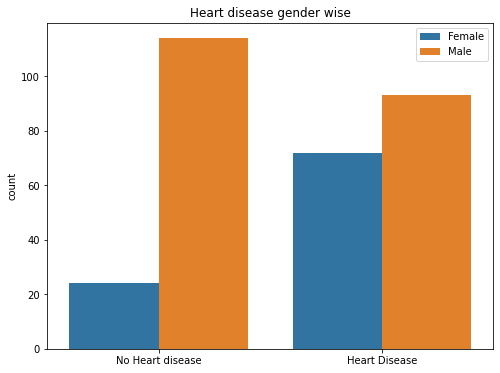

In [9]:
plt.figure(figsize =(8, 6))
f = sn.countplot(x = 'target', data = df, hue = 'sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart disease gender wise")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

### Plot heart disease by chest pain type

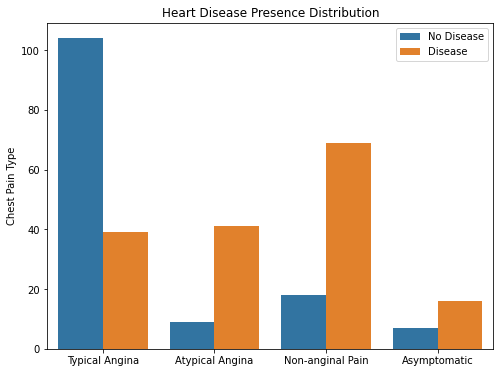

In [10]:
plt.figure(figsize =(8, 6))
f = sn.countplot(x='cp', data=df, hue='target')
f.set_title("Heart Disease Presence Distribution")
f.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.ylabel("Chest Pain Type")
plt.xlabel("")
plt.legend(['No Disease', 'Disease'])

From the above figure we can determine that having chest pain might not be indicative of heart disease.

### Age vs. Max Heart Rate for Heart Disease

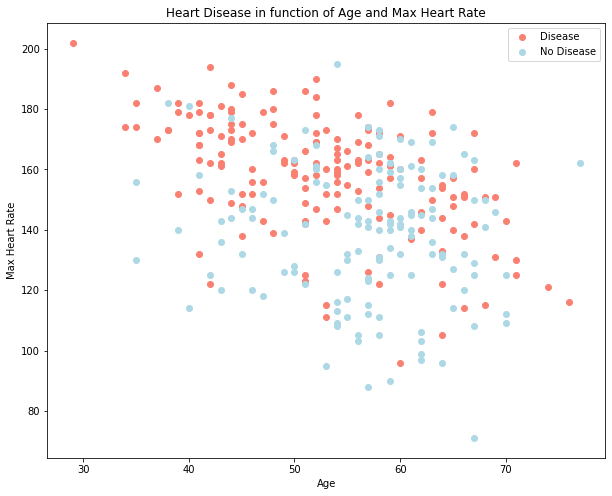

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="salmon")
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="lightblue")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

From the above scatter plot we can determine that maximum heart rate can be very predictive for the presence of a disease, regardless of age.

### Plot target column

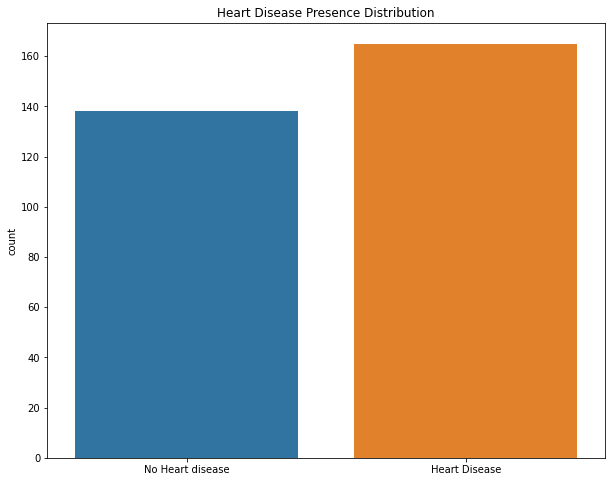

In [12]:
plt.figure(figsize =(10, 8))
f = sn.countplot(x='target', data=df)
f.set_title("Heart Disease Presence Distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

From the above histogram we can conclude that the data in the target variable is balanced.

### Correlation Matrix(heat map)

(14.5, -0.5)

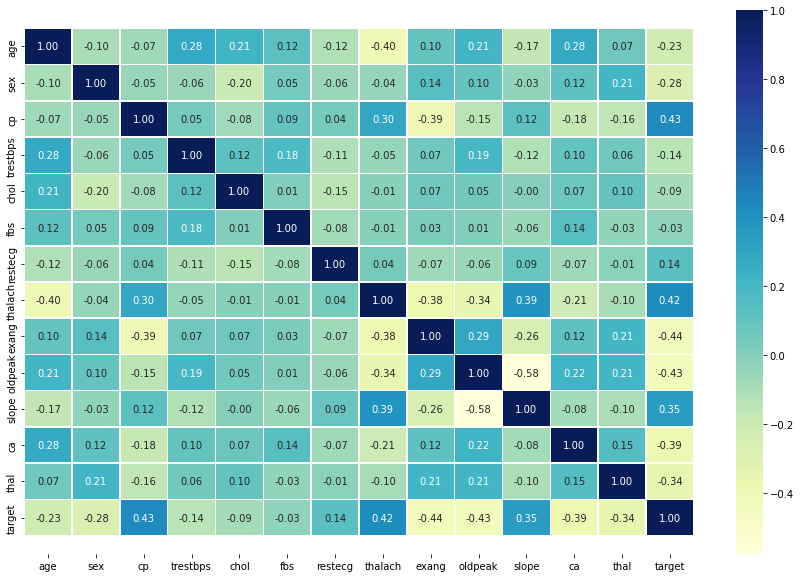

In [13]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sn.heatmap(corr, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Plot histograms for each variable

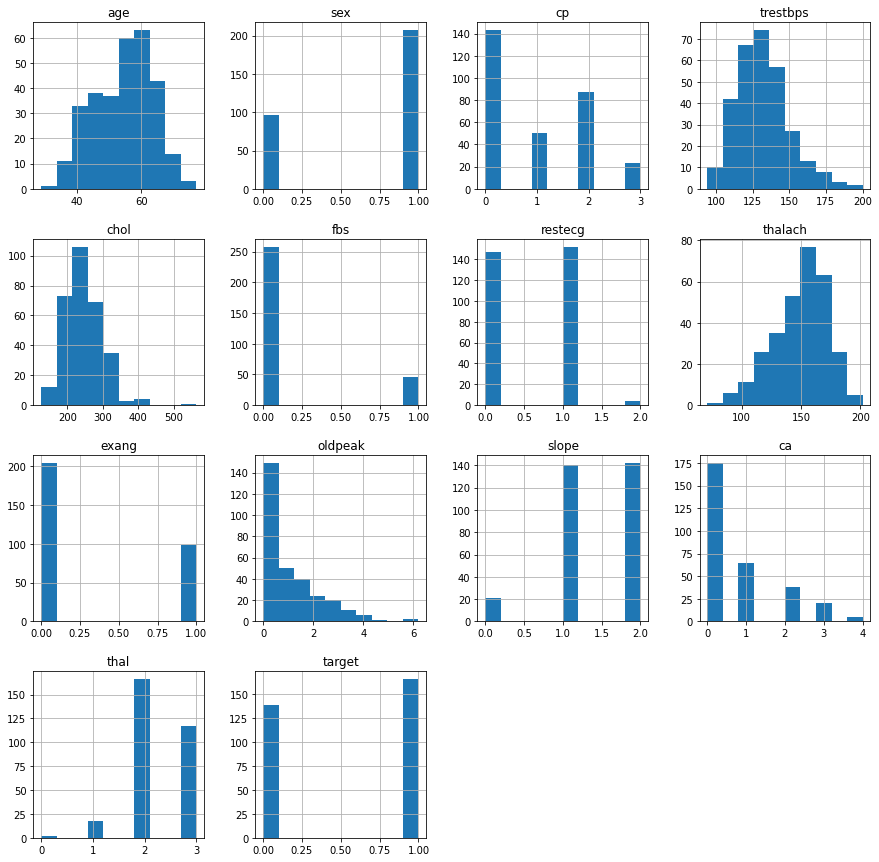

In [14]:
df.hist(figsize = (15, 15))
plt.show()

## Data Preprocessing

### Checking the distribution of the target variable

##### Splitting categorical columns

In [15]:
df = pd.get_dummies(df, columns = ['cp', 'restecg', 'slope', 'ca', 'thal'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   trestbps   303 non-null    int64  
 3   chol       303 non-null    int64  
 4   fbs        303 non-null    int64  
 5   thalach    303 non-null    int64  
 6   exang      303 non-null    int64  
 7   oldpeak    303 non-null    float64
 8   target     303 non-null    int64  
 9   cp_0       303 non-null    uint8  
 10  cp_1       303 non-null    uint8  
 11  cp_2       303 non-null    uint8  
 12  cp_3       303 non-null    uint8  
 13  restecg_0  303 non-null    uint8  
 14  restecg_1  303 non-null    uint8  
 15  restecg_2  303 non-null    uint8  
 16  slope_0    303 non-null    uint8  
 17  slope_1    303 non-null    uint8  
 18  slope_2    303 non-null    uint8  
 19  ca_0       303 non-null    uint8  
 20  ca_1      

In [17]:
df.tail()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
298,57,0,140,241,0,123,1,0.2,0,1,...,0,1,0,0,0,0,0,0,0,1
299,45,1,110,264,0,132,0,1.2,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,1,144,193,1,141,0,3.4,0,1,...,0,0,0,1,0,0,0,0,0,1
301,57,1,130,131,0,115,1,1.2,0,1,...,0,0,1,0,0,0,0,0,0,1
302,57,0,130,236,0,174,0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0


### Splitting the features and the target

In [18]:
X = df.drop('target', axis=1)
Y = df['target']
print(X.shape, Y.shape)

(303, 27) (303,)


In [19]:
Y.unique()

array([1, 0])

In [20]:
Y.value_counts()

1    165
0    138
Name: target, dtype: int64

### Normalization

In [21]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

X_norm

array([[0.70833333, 1.        , 0.48113208, ..., 1.        , 0.        ,
        0.        ],
       [0.16666667, 1.        , 0.33962264, ..., 0.        , 1.        ,
        0.        ],
       [0.25      , 0.        , 0.33962264, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.8125    , 1.        , 0.47169811, ..., 0.        , 0.        ,
        1.        ],
       [0.58333333, 1.        , 0.33962264, ..., 0.        , 0.        ,
        1.        ],
       [0.58333333, 0.        , 0.33962264, ..., 0.        , 1.        ,
        0.        ]])

### Splitting the data into training set and testing set

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2, stratify=Y, random_state=100)

In [23]:
print(X_train.shape, X_test.shape)

(242, 27) (61, 27)


## Data Models

### Confusion Matrix Function

In [24]:
def confusionmatrix(model):
    cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_pred)
    
    plt.figure(figsize = (10,7))
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

### Logistic Regression

#### Using `default` hyperparameter

In [25]:
lr1 = LogisticRegression(penalty='none', random_state=100)
lr1.fit(X_train, Y_train)
Y_pred = lr1.predict(X_test)
lr_train_acc = lr1.score(X_train, Y_train)*100
lr_test_acc = lr1.score(X_test, Y_test)*100
f1_score1 = f1_score(Y_test, Y_pred, average='binary')*100

print('Training data accuracy: ', lr_train_acc)
print('Testing data accuracy: ', lr_test_acc)
print('-'*50)
print('Mean Absolute Error: ', mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error: ',mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('-'*50)
print(classification_report(Y_test, Y_pred))

Training data accuracy:  86.36363636363636
Testing data accuracy:  86.88524590163934
--------------------------------------------------
Mean Absolute Error:  0.13114754098360656
Mean Squared Error:  0.13114754098360656
Root Mean Squared Error:  0.3621429841700741
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.86      0.91      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


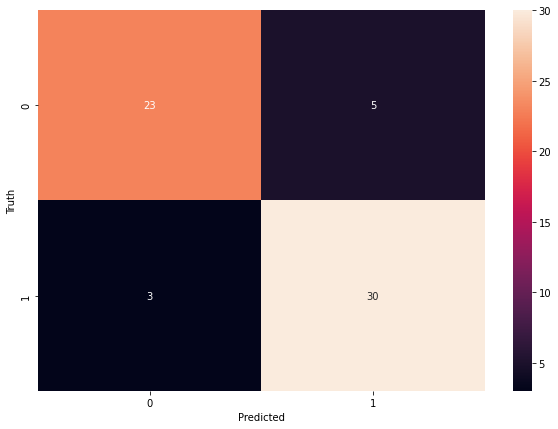

In [26]:
confusionmatrix(lr1)

In [27]:
fpr1, tpr1, thresholds1 = roc_curve(Y_test, Y_pred)
roc_auc1 = roc_auc_score(Y_test, Y_pred)

#### Using `Liblinear` hyperparameter



In [28]:
lr2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=100, C=0.1)
lr2.fit(X_train, Y_train)
Y_pred = lr2.predict(X_test)
lr_train_acc = lr2.score(X_train, Y_train)*100
lr_test_acc = lr2.score(X_test, Y_test)*100
f1_score2 = f1_score(Y_test, Y_pred, average='binary')*100

print('Training data accuracy: ', lr_train_acc)
print('Testing data accuracy: ', lr_test_acc)
print('-'*50)
print('Mean Absolute Error: ', mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error: ',mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('-'*50)
print(classification_report(Y_test, Y_pred))

Training data accuracy:  85.12396694214877
Testing data accuracy:  91.80327868852459
--------------------------------------------------
Mean Absolute Error:  0.08196721311475409
Mean Squared Error:  0.08196721311475409
Root Mean Squared Error:  0.2862991671569341
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        28
           1       0.89      0.97      0.93        33

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.92        61
weighted avg       0.92      0.92      0.92        61



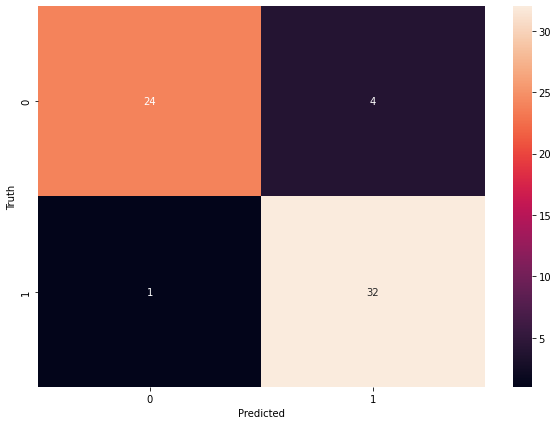

In [29]:
confusionmatrix(lr2)

In [30]:
fpr2, tpr2, thresholds2 = roc_curve(Y_test, Y_pred)
roc_auc2 = roc_auc_score(Y_test, Y_pred)

#### ROC Curve Comparison

In [31]:
roc_score_comparison=pd.DataFrame({'Logistic Regression':['Model 1','Model 2'],
                    'ROC Score':[roc_auc1, roc_auc2]})
roc_score_comparison_df=roc_score_comparison.sort_values(by='ROC Score')
roc_score_comparison_df=roc_score_comparison_df.set_index('Logistic Regression')
roc_score_comparison_df

,ROC Score
Logistic Regression,
Model 1,0.86526
Model 2,0.91342


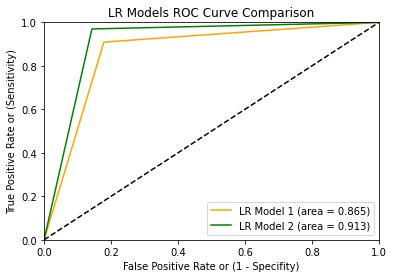

In [32]:
plt.plot(fpr1, tpr1, label='LR Model 1 (area = %0.3f)' % roc_auc1, color="orange")
plt.plot(fpr2, tpr2, label='LR Model 2 (area = %0.3f)' % roc_auc2, color="green")
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('LR Models ROC Curve Comparison')
plt.legend(loc="lower right")

#### F1 Score comparison

In [33]:
models = pd.DataFrame({'Logistic Regression': ['Model 1', 'Model 2'], 'F1 Score': [f1_score1, f1_score2]})
models

,Logistic Regression,F1 Score
0,Model 1,88.235294
1,Model 2,92.753623


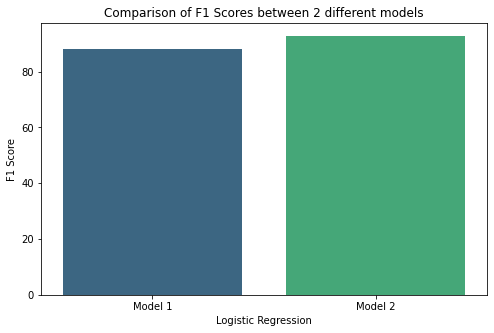

In [34]:
plt.figure(figsize=(8,5))
plt.title('Comparison of F1 Scores between 2 different models')
sn.barplot(x='Logistic Regression', y='F1 Score', data=models, palette='viridis')

#### Conclusion

From the above analysis we can determine that the second model is the better of the two. 

So we will use the second model's f1 & roc score when comparing with other models.

In [35]:
lr_f1_score = f1_score2
lr_roc_score = roc_auc2

### Random Forest Classifier

#### Using `Gini` hyperparameter

In [36]:
rfc1 = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=100, max_depth=8)
rfc1.fit(X_train, Y_train)
Y_pred = rfc1.predict(X_test)
rfc_train_acc = rfc1.score(X_train, Y_train)*100
rfc_test_acc = rfc1.score(X_test, Y_test)*100
f1_score1 = f1_score(Y_test, Y_pred, average='binary')*100

print('Training data accuracy: ', rfc_train_acc)
print('Testing data accuracy: ', rfc_test_acc)
print('-'*50)
print('Mean Absolute Error: ', mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error: ',mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('-'*50)
print(classification_report(Y_test, Y_pred))

Training data accuracy:  97.93388429752066
Testing data accuracy:  81.9672131147541
--------------------------------------------------
Mean Absolute Error:  0.18032786885245902
Mean Squared Error:  0.18032786885245902
Root Mean Squared Error:  0.4246502900652006
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



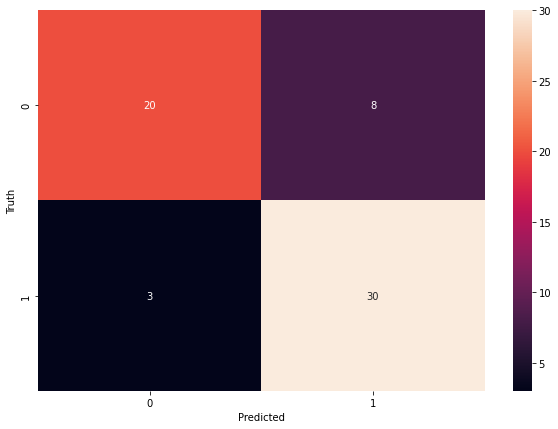

In [37]:
confusionmatrix(rfc1)

In [38]:
fpr1, tpr1, thresholds1 = roc_curve(Y_test, Y_pred)
roc_auc1 = roc_auc_score(Y_test, Y_pred)

#### Using `Entropy` hyperparameter

In [39]:
rfc2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=100, max_depth=8)
rfc2.fit(X_train, Y_train)
Y_pred = rfc2.predict(X_test)
rfc_train_acc = rfc2.score(X_train, Y_train)*100
rfc_test_acc = rfc2.score(X_test, Y_test)*100
f1_score2 = f1_score(Y_test, Y_pred, average='binary')*100

print('Training data accuracy: ', rfc_train_acc)
print('Testing data accuracy: ', rfc_test_acc)
print('-'*50)
print('Mean Absolute Error: ', mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error: ',mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('-'*50)
print(classification_report(Y_test, Y_pred))

Training data accuracy:  97.52066115702479
Testing data accuracy:  90.1639344262295
--------------------------------------------------
Mean Absolute Error:  0.09836065573770492
Mean Squared Error:  0.09836065573770492
Root Mean Squared Error:  0.31362502409359
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.89      0.94      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



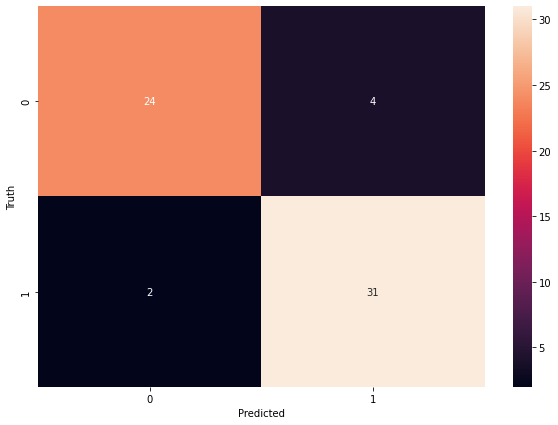

In [40]:
confusionmatrix(rfc2)

In [41]:
fpr2, tpr2, thresholds1 = roc_curve(Y_test, Y_pred)
roc_auc2 = roc_auc_score(Y_test, Y_pred)

#### ROC Curve Comparison

In [42]:
roc_score_comparison = pd.DataFrame({'Random Forest Classifier': ['Gini', 'Entropy'], 'ROC Score': [roc_auc1, roc_auc2]})
roc_score_comparison

,Random Forest Classifier,ROC Score
0,Gini,0.811688
1,Entropy,0.898268


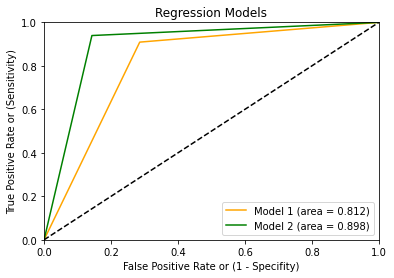

In [43]:
plt.plot(fpr1, tpr1, label='Model 1 (area = %0.3f)' % roc_auc1, color="orange")
plt.plot(fpr2, tpr2, label='Model 2 (area = %0.3f)' % roc_auc2, color="green")
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Regression Models')
plt.legend(loc="lower right")

#### F1 Score Comparison

In [44]:
models = pd.DataFrame({'Random Forest Classifier': ['Gini', 'Entropy'], 'F1 Score': [f1_score1, f1_score2]})
models

,Random Forest Classifier,F1 Score
0,Gini,84.507042
1,Entropy,91.176471


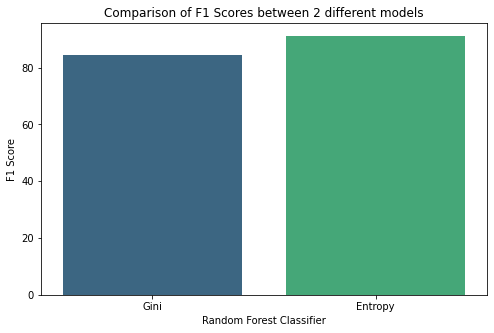

In [45]:
plt.figure(figsize=(8,5))
plt.title('Comparison of F1 Scores between 2 different models')
sn.barplot(x='Random Forest Classifier', y='F1 Score', data=models, palette='viridis')

#### Conclusion

From the above analysis we can determine that the Random Forest Classifier Model which uses `Entropy` is the better model.

So we will use the second model for comparing with other models.

In [46]:
rfc_f1_score = f1_score2
rfc_roc_score = roc_auc2

### K-Nearest Neighbour

In [47]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
knn_train_acc = knn.score(X_train, Y_train)*100
knn_test_acc = knn.score(X_test, Y_test)*100
f1_score = f1_score(Y_test, Y_pred, average='binary')*100

print('Training data accuracy: ', knn_train_acc)
print('Testing data accuracy: ', knn_test_acc)
print('-'*50)
print('Mean Absolute Error: ', mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error: ',mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('-'*50)
print(classification_report(Y_test, Y_pred))

Training data accuracy:  88.42975206611571
Testing data accuracy:  88.52459016393442
--------------------------------------------------
Mean Absolute Error:  0.11475409836065574
Mean Squared Error:  0.11475409836065574
Root Mean Squared Error:  0.3387537429470791
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.86      0.94      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



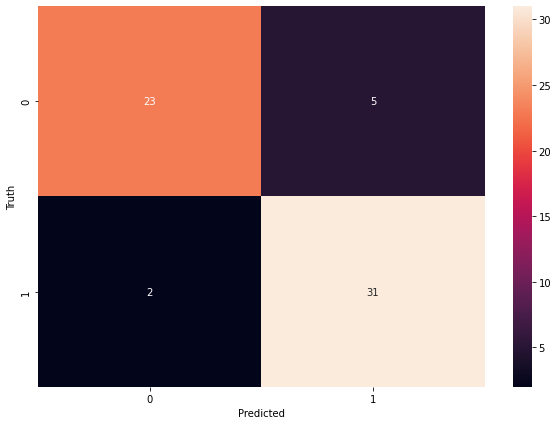

In [48]:
confusionmatrix(knn)

##### ROC Curve

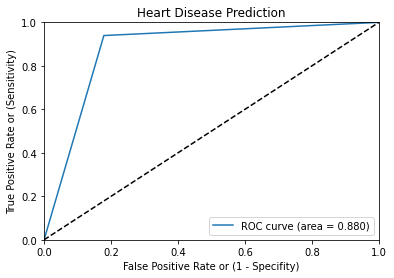

In [49]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Heart Disease Prediction')
plt.legend(loc="lower right")

In [50]:
knn_f1_score = f1_score
knn_roc_score = roc_auc

## Comparative Analysis

We will be comparing between the three models (Logistic Regression, Random Forest Classifier & KNN Classifier) and select the best one for predictions.

### F1 Score comparison

In [51]:
f1_results=pd.DataFrame({'Model':['Logistic Regression','Random Forest Classifier','KNearest Neighbour'],
                    'F1 Score':[lr_f1_score, rfc_f1_score, knn_f1_score]})
f1_result_df=f1_results.sort_values(by='F1 Score', ascending=False)
f1_result_df=f1_result_df.set_index('Model')
f1_result_df

,F1 Score
Model,
Logistic Regression,92.753623
Random Forest Classifier,91.176471
KNearest Neighbour,89.855072


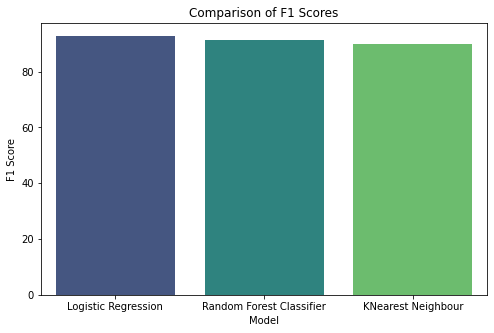

In [52]:
plt.figure(figsize=(8,5))
plt.title('Comparison of F1 Scores')
sn.barplot(x='Model', y='F1 Score', data=f1_results, palette='viridis')

### ROC Score Comparison

In [53]:
roc_results=pd.DataFrame({'Model':['Logistic Regression','Random Forest Classifier','KNearest Neighbour'],
                    'ROC Score':[lr_roc_score, rfc_roc_score, knn_roc_score]})
roc_result_df=roc_results.sort_values(by='ROC Score', ascending=False)
roc_result_df=roc_result_df.set_index('Model')
roc_result_df

,ROC Score
Model,
Logistic Regression,0.913420
Random Forest Classifier,0.898268
KNearest Neighbour,0.880411


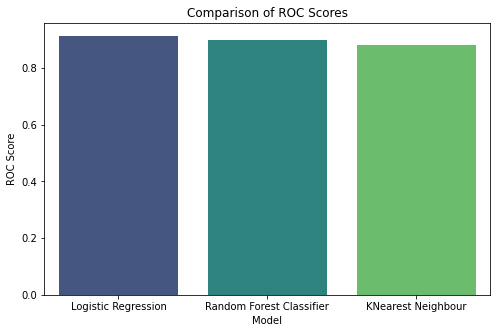

In [54]:
plt.figure(figsize=(8,5))
plt.title('Comparison of ROC Scores')
sn.barplot(x='Model', y='ROC Score', data=roc_results, palette='viridis')

### Conclusion

From the above Comparative Analysis we can determine that Logistic Regression is the best model of the three and we will be using it for our future predictions.

In [55]:
import pickle
pickle.dump(lr2, open('model.pkl', 'wb'))

#### Creating a dataframe with only dummy variables

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   trestbps   303 non-null    int64  
 3   chol       303 non-null    int64  
 4   fbs        303 non-null    int64  
 5   thalach    303 non-null    int64  
 6   exang      303 non-null    int64  
 7   oldpeak    303 non-null    float64
 8   target     303 non-null    int64  
 9   cp_0       303 non-null    uint8  
 10  cp_1       303 non-null    uint8  
 11  cp_2       303 non-null    uint8  
 12  cp_3       303 non-null    uint8  
 13  restecg_0  303 non-null    uint8  
 14  restecg_1  303 non-null    uint8  
 15  restecg_2  303 non-null    uint8  
 16  slope_0    303 non-null    uint8  
 17  slope_1    303 non-null    uint8  
 18  slope_2    303 non-null    uint8  
 19  ca_0       303 non-null    uint8  
 20  ca_1      

In [57]:
ddf = df.drop(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'target'], axis=1)
index_dict = dict(zip(ddf.columns,range(ddf.shape[1])))

In [58]:
joblib.dump(index_dict, 'ddf') 

['ddf']

In [59]:
model = joblib.load('model.pkl')
test_data = pd.DataFrame(X_test)
pred = model.predict([test_data.values[18]])

print(test_data.values[18])
print('Actual: ', Y_test.values[18])
print('Predicted: ',pred[0])

[0.77083333 1.         0.16981132 0.19634703 0.         0.46564885
 1.         0.01612903 1.         0.         0.         0.
 1.         0.         0.         0.         0.         1.
 0.         1.         0.         0.         0.         0.
 0.         1.         0.        ]
Actual:  0
Predicted:  0
